In [1]:
!pip install ipinfo

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipinfo
import json
from tqdm import tqdm

from category_encoders.hashing import HashingEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
#from kaggle_secrets import UserSecretsClient

In [3]:

dataset_folder = "C:\\Users\\moode\\Desktop\\Project_darknet\\" 

In [4]:
data = pd.read_csv(dataset_folder + "Darknet.CSV", low_memory=False, error_bad_lines=False)
data.head()

C:\Users\moode\AppData\Local\Temp\ipykernel_5768\1497190782.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv(dataset_folder + "Darknet.CSV", low_memory=False, error_bad_lines=False)


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,0,1.440000e+15,3117718.131,1.440000e+15,1.440000e+15,Non-Tor,AUDIO-STREAMING


In [5]:
samples = data.copy()

In [6]:

traffic_labels = samples["Label"].unique()
print(traffic_labels)
traffic_type_labels = samples["Label1"].unique()
print(traffic_type_labels)

['Non-Tor' 'NonVPN' 'Tor' 'VPN']
['AUDIO-STREAMING' 'Browsing' 'Chat' 'Email' 'File-Transfer'
 'File-transfer' 'P2P' 'Video-Streaming' 'Audio-Streaming'
 'Video-streaming' 'VOIP']


In [7]:
samples['Label1'].loc[samples['Label1'] == 'AUDIO-STREAMING'] = 'Audio-Streaming'
samples['Label1'].loc[samples['Label1'] == 'File-transfer'] = 'File-Transfer'
samples['Label1'].loc[samples['Label1'] == 'Video-streaming'] = 'Video-Streaming'

traffic_type_labels = samples["Label1"].unique()
print(traffic_type_labels)

['Audio-Streaming' 'Browsing' 'Chat' 'Email' 'File-Transfer' 'P2P'
 'Video-Streaming' 'VOIP']


C:\Users\moode\AppData\Local\Temp\ipykernel_5768\1317981687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samples['Label1'].loc[samples['Label1'] == 'AUDIO-STREAMING'] = 'Audio-Streaming'
C:\Users\moode\AppData\Local\Temp\ipykernel_5768\1317981687.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samples['Label1'].loc[samples['Label1'] == 'File-transfer'] = 'File-Transfer'
C:\Users\moode\AppData\Local\Temp\ipykernel_5768\1317981687.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [8]:
samples['Label'].loc[(samples['Label'] == 'Non-Tor') | (samples['Label'] == 'NonVPN')] = 'Benign'
samples['Label'].loc[(samples['Label'] == 'Tor') | (samples['Label'] == 'VPN')] = 'Darknet'

traffic_labels = samples["Label"].unique()
print(traffic_labels)

['Benign' 'Darknet']


C:\Users\moode\AppData\Local\Temp\ipykernel_5768\3876321010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samples['Label'].loc[(samples['Label'] == 'Non-Tor') | (samples['Label'] == 'NonVPN')] = 'Benign'
C:\Users\moode\AppData\Local\Temp\ipykernel_5768\3876321010.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samples['Label'].loc[(samples['Label'] == 'Tor') | (samples['Label'] == 'VPN')] = 'Darknet'


In [9]:
hours = []
for timestamp in samples['Timestamp']:
    hora = int(timestamp.split()[1].split(':')[0])
    hours.append(hora)
samples['hour'] = hours
print(samples[['Timestamp', 'hour']][:5])

                Timestamp  hour
0  24/07/2015 04:09:48 PM     4
1  24/07/2015 04:09:48 PM     4
2  24/07/2015 04:09:48 PM     4
3  24/07/2015 04:09:48 PM     4
4  24/07/2015 04:09:45 PM     4


In [10]:
def create_grams(ip):
    parts = ip.split('.')
    one_gram = parts[0]
    two_gram = parts[0] + " " + parts[1]
    three_gram = parts[0] + " " + parts[1] + " " + parts[2]
    return one_gram, two_gram, three_gram

In [11]:
src_one_gram = []
src_two_gram = []
src_three_gram = []
dst_one_gram = []
dst_two_gram = []
dst_three_gram = []

for src_ip, dst_ip in zip(samples["Src IP"], samples["Dst IP"]): 
    src_one, src_two, src_three = create_grams(src_ip)
    src_one_gram.append(src_one)
    src_two_gram.append(src_two)
    src_three_gram.append(src_three)
    dst_one, dst_two, dst_three = create_grams(dst_ip)
    dst_one_gram.append(dst_one)
    dst_two_gram.append(dst_two)
    dst_three_gram.append(dst_three)

samples["src_ip_1gram"] = src_one_gram
samples["src_ip_2gram"] = src_two_gram
samples["src_ip_3gram"] = src_three_gram

samples["dst_ip_1gram"] = dst_one_gram
samples["dst_ip_2gram"] = dst_two_gram
samples["dst_ip_3gram"] = dst_three_gram

In [12]:
print(samples[["Src IP","src_ip_1gram","src_ip_2gram","src_ip_3gram"]][200:205])
print(samples[["Dst IP","dst_ip_1gram","dst_ip_2gram","dst_ip_3gram"]][:5])

            Src IP src_ip_1gram src_ip_2gram src_ip_3gram
200  10.152.152.11           10       10 152   10 152 152
201  74.125.28.189           74       74 125    74 125 28
202  74.125.28.189           74       74 125    74 125 28
203  10.152.152.11           10       10 152   10 152 152
204  10.152.152.11           10       10 152   10 152 152
           Dst IP dst_ip_1gram dst_ip_2gram dst_ip_3gram
0   216.58.220.99          216       216 58   216 58 220
1   216.58.220.99          216       216 58   216 58 220
2   216.58.220.99          216       216 58   216 58 220
3  74.125.136.120           74       74 125   74 125 136
4  173.194.65.127          173      173 194   173 194 65


In [13]:
def get_ip_detail(ip, ip_dict, repeated):
    if ip not in ip_dict.keys():
        details = ipinfo_handler.getDetails(ip)
        ip_dict[ip] = details.all
    else:
        repeated += 1
    return repeated

def dump_ips(ip_dict, folder):
    j = json.dumps(ip_dict)
    f = open(folder+"ips_dict.json","w")
    f.write(j)
    f.close()

def load_ips(file):
    data = {}
    with open(file) as json_file:
        data = json.load(json_file)
    return data

In [14]:
ip_dict = load_ips("C:\\Users\\moode\\Desktop\\Project_darknet\\ips_dict.json")

In [15]:
ips = np.concatenate((samples["Src IP"].unique(), samples["Dst IP"].unique())) 
for i in tqdm(range(len(ips))):
    get_ip_detail(ips[i], ip_dict, 0)
dump_ips(ip_dict, "")

100%|████████████████████████████████████████████████████████████████████████| 11111/11111 [00:00<00:00, 268948.81it/s]


In [16]:
ips_tuple = zip(samples["Src IP"], samples["Dst IP"])
dst_ip_country = []
src_ip_country = []
src_bogon = []
dst_bogon = []

for src_ip, dst_ip in tqdm(ips_tuple, total=len(samples["Src IP"])):
    if 'country' in ip_dict[dst_ip].keys():
        dst_ip_country.append(ip_dict[dst_ip]['country'])
    else:
        dst_ip_country.append("")
    if 'country' in ip_dict[src_ip].keys():
        src_ip_country.append(ip_dict[src_ip]['country'])
    else:
        src_ip_country.append("")
    if 'bogon' in ip_dict[dst_ip].keys():
        dst_bogon.append(ip_dict[dst_ip]['bogon'])
    else:
        dst_bogon.append(False)
    if 'bogon' in ip_dict[src_ip].keys():
        src_bogon.append(ip_dict[src_ip]['bogon'])
    else:
        src_bogon.append(False)
samples['src_ip_country'] = src_ip_country
samples['dst_ip_country'] = dst_ip_country
samples['src_bogon'] = src_bogon
samples['dst_bogon'] = dst_bogon

100%|██████████████████████████████████████████████████████████████████████| 141530/141530 [00:00<00:00, 332865.96it/s]


In [17]:
real_columns = ['Flow Duration', 'Total Fwd Packet', 'Total Bwd packets', 'Total Length of Fwd Packet', 'Total Length of Bwd Packet', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio', 'Average Packet Size', 'Fwd Segment Size Avg', 'Bwd Segment Size Avg', 'Fwd Bytes/Bulk Avg', 'Fwd Packet/Bulk Avg', 'Fwd Bulk Rate Avg', 'Bwd Bytes/Bulk Avg', 'Bwd Packet/Bulk Avg', 'Bwd Bulk Rate Avg', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'FWD Init Win Bytes', 'Bwd Init Win Bytes', 'Fwd Act Data Pkts', 'Fwd Seg Size Min']
print(real_columns)

['Flow Duration', 'Total Fwd Packet', 'Total Bwd packets', 'Total Length of Fwd Packet', 'Total Length of Bwd Packet', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio', 'Average

In [18]:
is_na_cols = samples.columns[samples.isna().sum() > 0]
samples.isna().sum()[is_na_cols] 

Flow Bytes/s    47
dtype: int64

In [19]:
samples = samples.dropna()
samples.isna().sum()[is_na_cols] 

Flow Bytes/s    0
dtype: int64

In [20]:
samples[real_columns] = samples[real_columns].astype(np.float64)
samples[real_columns] = samples[real_columns].replace([np.inf, -np.inf], np.nan)
samples[real_columns] = samples[real_columns].dropna()

In [21]:
model_samples = samples.copy()

del model_samples['Flow ID']
del model_samples['Timestamp']
del model_samples['Src IP']
del model_samples['Dst IP']

In [22]:
cols = np.concatenate((model_samples.columns[81:], model_samples.columns[:81]))
model_samples = model_samples[cols]

In [23]:
cols = np.concatenate((model_samples.columns[81:], model_samples.columns[:81]))
model_samples = model_samples[cols]

In [24]:


model_samples.columns



Index(['Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max',
       'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min', 'Label',
       'Label1', 'hour', 'src_ip_1gram', 'src_ip_2gram', 'src_ip_3gram',
       'dst_ip_1gram', 'dst_ip_2gram', 'dst_ip_3gram', 'src_ip_country',
       'dst_ip_country', 'src_bogon', 'dst_bogon', 'Src Port', 'Dst Port',
       'Protocol', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bw

In [25]:
hash_enc_cols = ['src_ip_1gram', 'src_ip_2gram', 'src_ip_3gram', 'dst_ip_1gram',
 'dst_ip_2gram', 'dst_ip_3gram']
print(hash_enc_cols)
ord_enc_cols = ['src_ip_country','dst_ip_country']
print(ord_enc_cols)

['src_ip_1gram', 'src_ip_2gram', 'src_ip_3gram', 'dst_ip_1gram', 'dst_ip_2gram', 'dst_ip_3gram']
['src_ip_country', 'dst_ip_country']


In [26]:
hash_enc = HashingEncoder(cols=hash_enc_cols, n_components=100).fit(model_samples)
model_samples = hash_enc.transform(model_samples)
model_samples.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1892.0,1047.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1987.0,1047.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2049.0,1047.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008.0,1047.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,659.0,6605.0,0.0,65.0,0.0,6.0,1382.0,2320.0,581.0


In [27]:
ord_enc = OrdinalEncoder()
ord_enc.fit(model_samples[ord_enc_cols])
model_samples[ord_enc_cols] = ord_enc.transform(model_samples[ord_enc_cols])
model_samples[ord_enc_cols] = model_samples[ord_enc_cols].astype(int)
model_samples[ord_enc_cols].head()

,src_ip_country,dst_ip_country
0,0,134
1,0,134
2,0,134
3,0,134
4,0,134


In [28]:
print(model_samples.columns)

Index(['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7',
       'col_8', 'col_9',
       ...
       'Bwd Bytes/Bulk Avg', 'Bwd Packet/Bulk Avg', 'Bwd Bulk Rate Avg',
       'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets',
       'Subflow Bwd Bytes', 'FWD Init Win Bytes', 'Bwd Init Win Bytes',
       'Fwd Act Data Pkts'],
      dtype='object', length=186)


In [29]:
scaler = StandardScaler().fit(model_samples[real_columns])
model_samples[real_columns] = scaler.transform(model_samples[real_columns])
model_samples[real_columns].head()

,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min
0,-0.546508,-0.063838,-0.044949,-0.034644,-0.028574,-0.321759,-0.498852,-0.316449,-0.379416,-0.292366,...,-0.052228,-0.043209,-0.634075,-0.313203,0.0,-0.413046,-0.345303,-0.095141,-0.061219,0.589647
1,-0.546503,-0.063838,-0.044949,-0.034644,-0.028574,-0.321759,-0.498852,-0.316449,-0.379416,-0.292366,...,-0.052228,-0.043209,-0.634075,-0.313203,0.0,-0.413046,-0.335704,-0.095141,-0.061219,0.589647
2,-0.546502,-0.063838,-0.044949,-0.034644,-0.028574,-0.321759,-0.498852,-0.316449,-0.379416,-0.292366,...,-0.052228,-0.043209,-0.634075,-0.313203,0.0,-0.413046,-0.329439,-0.095141,-0.061219,0.589647
3,-0.546504,-0.063838,-0.044949,-0.034644,-0.028574,-0.321759,-0.498852,-0.316449,-0.379416,-0.292366,...,-0.052228,-0.043209,-0.634075,-0.313203,0.0,-0.413046,-0.333582,-0.095141,-0.061219,0.589647
4,-0.263585,0.184194,0.071741,-0.014801,-0.027116,-0.120075,-0.498852,0.179861,-0.247304,0.340530,...,0.164343,-0.036900,-0.634075,0.158678,0.0,-0.368398,-0.396835,0.073134,0.305786,0.589647


In [30]:

samples = samples.dropna()
model_samples = model_samples.dropna()
print(samples[samples.columns[samples.isna().sum()>0]].isna().sum())

Series([], dtype: float64)


In [31]:
samples.to_csv('darknet_dataset_processed.csv', index=False)

In [32]:
model_samples.to_csv('darknet_dataset_processed_encoded.csv', index=False)

In [33]:
import pandas as pd 
import matplotlib.pyplot as plt
df  = pd.read_csv("C:\\Users\\moode\\Desktop\\Project_darknet\\darknet_dataset_processed_encoded.csv")
df.head(20)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts
0,0,0,0,0,0,0,0,0,0,0,...,0.0,-0.052228,-0.043209,-0.634075,-0.313203,0.0,-0.413046,-0.345303,-0.095141,-0.061219
1,0,0,0,0,0,0,0,0,0,0,...,0.0,-0.052228,-0.043209,-0.634075,-0.313203,0.0,-0.413046,-0.335704,-0.095141,-0.061219
2,0,0,0,0,0,0,0,0,0,0,...,0.0,-0.052228,-0.043209,-0.634075,-0.313203,0.0,-0.413046,-0.329439,-0.095141,-0.061219
3,0,0,0,0,0,0,0,0,0,0,...,0.0,-0.052228,-0.043209,-0.634075,-0.313203,0.0,-0.413046,-0.333582,-0.095141,-0.061219
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.164343,-0.036900,-0.634075,0.158678,0.0,-0.368398,-0.396835,0.073134,0.305786
5,0,0,0,0,0,0,0,0,0,0,...,0.0,-0.052228,-0.043209,-0.634075,-0.247865,0.0,-0.346075,0.938758,-0.112854,-0.060588
6,0,0,0,0,0,0,0,0,0,0,...,0.0,-0.037768,-0.034397,-0.634075,0.347430,0.0,1.983028,0.686957,1.024885,0.070802
7,0,0,0,0,0,0,0,0,0,0,...,0.0,-0.044012,-0.038482,-0.634075,1.712252,0.0,-0.078191,1.599784,0.866657,0.108071
8,0,0,0,0,0,0,0,0,0,0,...,0.0,-0.048613,-0.039102,-0.634075,0.557961,0.0,0.680814,-0.269722,0.208758,-0.041637
9,0,0,0,0,0,0,0,0,0,0,...,0.0,1.402641,-0.037294,-0.634075,-0.044594,0.0,0.115281,0.938758,0.465996,1.691690


In [34]:
df.isnull().any(axis=1).sum()

0

In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder# creating initial dataframe

labelencoder = LabelEncoder()
df['Label'] = labelencoder.fit_transform(df['Label'])
df

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts
0,0,0,0,0,0,0,0,0,0,0,...,0.0,-0.052228,-0.043209,-0.634075,-0.313203,0.0,-0.413046,-0.345303,-0.095141,-0.061219
1,0,0,0,0,0,0,0,0,0,0,...,0.0,-0.052228,-0.043209,-0.634075,-0.313203,0.0,-0.413046,-0.335704,-0.095141,-0.061219
2,0,0,0,0,0,0,0,0,0,0,...,0.0,-0.052228,-0.043209,-0.634075,-0.313203,0.0,-0.413046,-0.329439,-0.095141,-0.061219
3,0,0,0,0,0,0,0,0,0,0,...,0.0,-0.052228,-0.043209,-0.634075,-0.313203,0.0,-0.413046,-0.333582,-0.095141,-0.061219
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.164343,-0.036900,-0.634075,0.158678,0.0,-0.368398,-0.396835,0.073134,0.305786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141476,0,0,0,0,1,0,0,0,0,0,...,0.0,-0.052228,-0.043209,1.577100,-0.153489,0.0,-0.413046,-0.536477,-0.233542,-0.060588
141477,0,0,0,0,1,0,0,0,0,0,...,0.0,-0.052228,-0.043209,1.577100,-0.153489,0.0,-0.413046,-0.536477,-0.233542,-0.060588
141478,0,0,0,0,1,0,0,0,0,0,...,0.0,-0.052228,-0.043209,1.577100,-0.153489,0.0,-0.413046,-0.536477,-0.233542,-0.060588
141479,0,0,0,0,1,0,0,0,0,0,...,0.0,-0.052228,-0.043209,1.577100,-0.153489,0.0,-0.413046,-0.536477,-0.233542,-0.060588


In [36]:
df.columns

Index(['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7',
       'col_8', 'col_9',
       ...
       'Bwd Bytes/Bulk Avg', 'Bwd Packet/Bulk Avg', 'Bwd Bulk Rate Avg',
       'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets',
       'Subflow Bwd Bytes', 'FWD Init Win Bytes', 'Bwd Init Win Bytes',
       'Fwd Act Data Pkts'],
      dtype='object', length=186)

In [37]:
df['Label'].unique()

array([0, 1])

In [38]:
df['Label1'].unique()

array(['Audio-Streaming', 'Browsing', 'Chat', 'Email', 'File-Transfer',
       'P2P', 'Video-Streaming', 'VOIP'], dtype=object)

In [39]:
X = df.drop('Label1',axis=1) # all features without (label) feature
Y = df['Label1'] # only label feature 
Y.shape
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.40, random_state=1000)

In [40]:
X.shape

(141481, 185)

In [41]:
Y.shape

(141481,)

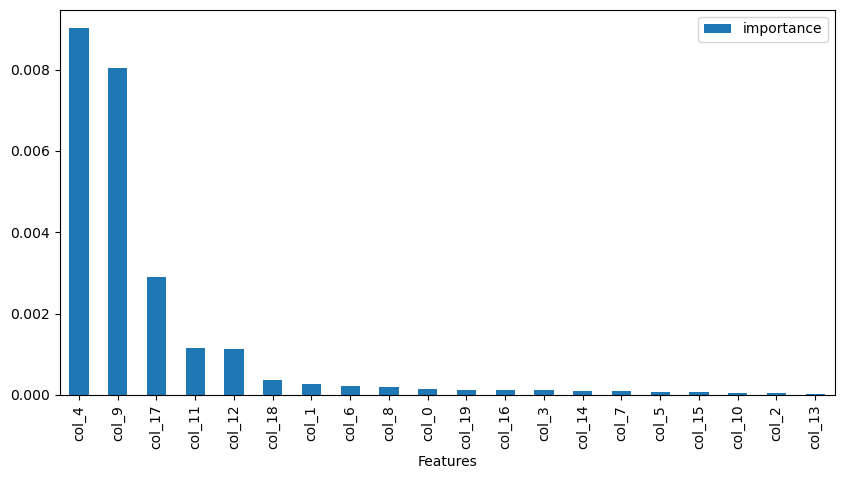

In [42]:
import numpy as np
import sklearn as sk 
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=50, random_state=100,max_depth=15,criterion='entropy')
forest.fit(X_train, y_train)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
indices = np.argsort(importances)[::-1]
refclasscol=list(df.columns.values)
impor_bars = pd.DataFrame({'Features':refclasscol[0:20],'importance':importances[0:20]})


impor_bars = impor_bars.sort_values('importance',ascending=False).set_index('Features')
plt.rcParams['figure.figsize'] = (10, 5)
impor_bars.plot.bar();

In [43]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from numpy import sort
from sklearn.feature_selection import SelectFromModel
thresholds = sort(forest.feature_importances_)
for thresh in thresholds:
 # select features using threshold
 selection = SelectFromModel(forest, threshold=thresh, prefit=False)
 select_X_train = selection.fit_transform(X_train,y_train)
 # train model
 selection_model = RandomForestClassifier(n_estimators=50, random_state=200,max_depth=15,criterion='entropy')
 selection_model.fit(select_X_train, y_train)
 # eval model
 select_X_test = selection.transform(X_test)
 predictions = selection_model.predict(select_X_test)
 accuracy = accuracy_score(y_test, predictions)
 print("Thresh=%f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.000000, n=185, Accuracy: 94.70%
Thresh=0.000000, n=185, Accuracy: 94.70%
Thresh=0.000000, n=185, Accuracy: 94.70%
Thresh=0.000000, n=185, Accuracy: 94.70%
Thresh=0.000000, n=185, Accuracy: 94.70%
Thresh=0.000000, n=185, Accuracy: 94.70%
Thresh=0.000000, n=185, Accuracy: 94.70%
Thresh=0.000000, n=185, Accuracy: 94.70%
Thresh=0.000000, n=185, Accuracy: 94.70%
Thresh=0.000000, n=185, Accuracy: 94.70%
Thresh=0.000000, n=185, Accuracy: 94.70%
Thresh=0.000000, n=185, Accuracy: 94.70%
Thresh=0.000000, n=185, Accuracy: 94.70%
Thresh=0.000000, n=185, Accuracy: 94.70%
Thresh=0.000000, n=185, Accuracy: 94.70%
Thresh=0.000018, n=170, Accuracy: 94.79%
Thresh=0.000018, n=169, Accuracy: 95.06%
Thresh=0.000019, n=168, Accuracy: 94.90%
Thresh=0.000020, n=167, Accuracy: 94.95%
Thresh=0.000021, n=166, Accuracy: 94.94%
Thresh=0.000022, n=165, Accuracy: 95.13%
Thresh=0.000023, n=164, Accuracy: 94.99%
Thresh=0.000024, n=163, Accuracy: 95.04%
Thresh=0.000025, n=162, Accuracy: 94.93%
Thresh=0.000026,

In [87]:

selection = SelectFromModel(forest, threshold=0.013101, prefit=False)
select_X_train = selection.fit_transform(X_train,y_train)
select_X_test = selection.transform(X_test)

In [88]:
select_X_train.shape

(84888, 17)

In [89]:
select_X_test.shape

(56593, 17)

In [91]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [95]:
# Creating holders to store the model performance results
list1  = []
list2  = []
list3  = []
list4  = []
list5  = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  list1.append(model)
  list2.append(round(a, 3))
  list3.append(round(b, 3))
  list4.append(round(c, 3))
  list5.append(round(d, 3))

In [96]:
from sklearn import tree


dt_model  =tree.DecisionTreeClassifier(random_state=101, max_depth=23,criterion="entropy")
dt_model.fit(select_X_train, y_train)

# Make predictions on the testing data
y_pred_dt = dt_model.predict(select_X_test)

# Calculate and print the accuracy score
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy score: {accuracy_dt}")

# Calculate and print the f1 score
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
print(f"F1 score: {f1_dt}")
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
print(f"Recall score: {recall_dt:}")

# Calculate and print the precision score
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
print(f"Precision score: {precision_dt}")

Accuracy score: 0.9564433763893061
F1 score: 0.9562143395663859
Recall score: 0.9564433763893061
Precision score: 0.9562837654539126


In [97]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Decision tree',accuracy_dt,f1_dt,
             recall_dt,precision_dt)

In [98]:
from sklearn.naive_bayes import GaussianNB



gnb = GaussianNB()
gnb.fit(select_X_train, y_train)

# Make predictions on the testing data
y_pred_gnb = dt_model.predict(select_X_test)

# Calculate and print the accuracy score
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f"Accuracy score: {accuracy_gnb}")

# Calculate and print the f1 score
f1_gnb = f1_score(y_test, y_pred_gnb, average='weighted')
print(f"F1 score: {f1_gnb}")
recall_gnb = recall_score(y_test, y_pred_gnb, average='weighted')
print(f"Recall score: {recall_gnb}")

# Calculate and print the precision score
precision_gnb = precision_score(y_test, y_pred_gnb, average='weighted')
print(f"Precision score: {precision_gnb}")

Accuracy score: 0.9564433763893061
F1 score: 0.9562143395663859
Recall score: 0.9564433763893061
Precision score: 0.9562837654539126


In [99]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Gaussian naive bayes',accuracy_gnb,f1_gnb,
             recall_gnb,precision_gnb)

In [100]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(n_estimators=30, random_state=42)
ab.fit(select_X_train,y_train), 
# Make predictions on the testing data
y_pred_ab = ab.predict(select_X_test)

# Calculate and print the accuracy score
accuracy_ab = accuracy_score(y_test, y_pred_ab)
print(f"Accuracy score: {accuracy_ab}")

# Calculate and print the f1 score
f1_ab = f1_score(y_test, y_pred_ab, average='weighted')
print(f"F1 score: {f1_ab}")
recall_ab = recall_score(y_test, y_pred_ab, average='weighted')
print(f"Recall score: {recall_ab}")

# Calculate and print the precision score
precision_ab = precision_score(y_test, y_pred_ab, average='weighted')
print(f"Precision score: {precision_ab}")

Accuracy score: 0.6349018429841147
F1 score: 0.6250865734925839
Recall score: 0.6349018429841147
Precision score: 0.6368400601331061


In [101]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('AdaBoost ',accuracy_ab,f1_ab,
             recall_ab,precision_ab)

In [102]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
# Fit the model to the training data
knn.fit(select_X_train, y_train)

# Make predictions on the testing data
y_pred_knn = knn.predict(select_X_test)

# Calculate and print the accuracy score
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy score: {accuracy_knn}")

# Calculate and print the f1 score
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
print(f"F1 score: {f1_knn}")
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
print(f"Recall score: {recall_knn}")

# Calculate and print the precision score
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
print(f"Precision score: {precision_knn}")

C:\Users\moode\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy score: 0.623628363931935
F1 score: 0.5977646006107106
Recall score: 0.623628363931935
Precision score: 0.6419562864114319


In [103]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('KNN',accuracy_knn,f1_knn,
             recall_knn,precision_knn)

In [106]:
from sklearn.linear_model import LogisticRegression

lg_model  = LogisticRegression( random_state=101, max_iter=1000)
lg_model.fit(select_X_train, y_train)

# Make predictions on the testing data
y_pred_lg = lg_model.predict(select_X_test)

# Calculate and print the accuracy score
accuracy_lg = accuracy_score(y_test, y_pred_lg)
print(f"Accuracy score: {accuracy}")

# Calculate and print the f1 score
f1_lg = f1_score(y_test, y_pred_lg, average='weighted')
print(f"F1 score: {f1_lg}")
recall_lg = recall_score(y_test, y_pred_lg, average='weighted')
print(f"Recall score: {recall_lg}")

# Calculate and print the precision score
precision_lg = precision_score(y_test, y_pred_lg, average='weighted')
print(f"Precision score: {precision_lg}")BalancedBaggingClassifier

Accuracy score: 0.35105048327531674
F1 score: 0.19889553976075078
Recall score: 0.35105048327531674
Precision score: 0.2320333356496275


C:\Users\moode\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [107]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('LogisticRegression',accuracy_lg,f1_lg,
             recall_lg,precision_lg)

In [108]:
from imblearn.ensemble import BalancedBaggingClassifier
bbc = BalancedBaggingClassifier(random_state=42)

bbc.fit(select_X_train, y_train)
# Make predictions on the testing data
y_pred_bcc =bbc.predict(select_X_test)

#Calculate and print the accuracy score
accuracy_bcc  = accuracy_score(y_test, y_pred_bcc)
print(f"Accuracy score: {accuracy_bcc}")

# Calculate and print the f1 score
f1_bcc = f1_score(y_test, y_pred_bcc, average='weighted')
print(f"F1 score: {f1_bcc}")
recall_bcc = recall_score(y_test, y_pred_bcc, average='weighted')
print(f"Recall score: {recall_bcc}")

#Calculate and print the precision score
precision_bcc = precision_score(y_test, y_pred_bcc, average='weighted')
print(f"Precision score: {precision_bcc}")

Accuracy score: 0.9502411959076211
F1 score: 0.950575035455172
Recall score: 0.9502411959076211
Precision score: 0.9512784836780764


In [109]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('BalancedBaggingClassifier',accuracy_bcc,f1_bcc,
             recall_bcc,precision_bcc)

In [110]:
from imblearn.ensemble import EasyEnsembleClassifier
ecc = EasyEnsembleClassifier(random_state=42)
ecc.fit(select_X_train, y_train)

# Make predictions on the testing data
y_pred_ecc =ecc.predict(select_X_test)

#Calculate and print the accuracy score
accuracy_ecc  = accuracy_score(y_test, y_pred_ecc)
print(f"Accuracy score: {accuracy_ecc}")

# Calculate and print the f1 score
f1_ecc = f1_score(y_test, y_pred_ecc, average='weighted')
print(f"F1 score: {f1_ecc}")
recall_ecc = recall_score(y_test, y_pred_ecc, average='weighted')
print(f"Recall score: {recall_ecc}")

#Calculate and print the precision score
precision_ecc = precision_score(y_test, y_pred_ecc, average='weighted')
print(f"Precision score: {precision_ecc}")

Accuracy score: 0.5046560528687294
F1 score: 0.5047949115038758
Recall score: 0.5046560528687294
Precision score: 0.5821911328771957


In [111]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('EasyEnsembleClassifier',accuracy_ecc,f1_ecc,
             recall_ecc,precision_ecc)

In [112]:
from catboost import CatBoostClassifier

cb = CatBoostClassifier(loss_function='MultiClass', iterations=100, depth=6, l2_leaf_reg=3, 
                                 random_state=101 ,verbose=0)
cb.fit(select_X_train, y_train)


# Make predictions on the testing data
y_pred_cb = cb.predict(select_X_test)

# Calculate and print the accuracy score
accuracy_cb = accuracy_score(y_test, y_pred_cb)
print(f"Accuracy score: {accuracy_cb}")

# Calculate and print the f1 score
f1_cb = f1_score(y_test, y_pred_cb, average='weighted')
print(f"F1 score: {f1_cb}")
recall_cb = recall_score(y_test, y_pred_cb, average='weighted')
print(f"Recall score: {recall_cb}")

# Calculate and print the precision score
precision_cb = precision_score(y_test, y_pred_cb, average='weighted')
print(f"Precision score: {precision_cb}")

Accuracy score: 0.9100418779707737
F1 score: 0.9088218886912411
Recall score: 0.9100418779707737
Precision score: 0.9084553084188607


In [113]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('CatBoost ',accuracy_cb,f1_cb,
             recall_cb,precision_cb)

In [114]:
from imblearn.ensemble import BalancedRandomForestClassifier
brfc = BalancedRandomForestClassifier(max_depth=30, random_state=0)

brfc.fit(select_X_train, y_train)
# Make predictions on the testing data
y_pred_brfc = brfc.predict(select_X_test)

# Calculate and print the accuracy score
accuracy_brfc= accuracy_score(y_test, y_pred_brfc)
print(f"Accuracy score: {accuracy_brfc}")

# Calculate and print the f1 score
f1_brfc = f1_score(y_test, y_pred_brfc, average='weighted')
print(f"F1 score: {f1_brfc}")
recall_brfc = recall_score(y_test, y_pred_brfc, average='weighted')
print(f"Recall score: {recall_brfc}")

# Calculate and print the precision score
precision_brfc = precision_score(y_test, y_pred_brfc, average='weighted')
print(f"Precision score: {precision_brfc}")

Accuracy score: 0.9482444825331755
F1 score: 0.9488682724159123
Recall score: 0.9482444825331755
Precision score: 0.9521755676644812


In [115]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('BalancedRandomForestClassifier',accuracy_brfc,f1_brfc,
             recall_brfc,precision_brfc)

In [116]:
from imblearn.ensemble import RUSBoostClassifier
rbc = RUSBoostClassifier(random_state=0)

rbc.fit(select_X_train, y_train)
# Make predictions on the testing data
y_pred_rbc =rbc.predict(select_X_test)

#Calculate and print the accuracy score
accuracy_rbc  = accuracy_score(y_test, y_pred_rbc)
print(f"Accuracy score: {accuracy_rbc}")

# Calculate and print the f1 score
f1_rbc = f1_score(y_test, y_pred_rbc, average='weighted')
print(f"F1 score: {f1_rbc}")
recall_rbc = recall_score(y_test, y_pred_rbc, average='weighted')
print(f"Recall score: {recall_rbc}")

#Calculate and print the precision score
precision_rbc = precision_score(y_test, y_pred_bcc, average='weighted')
print(f"Precision score: {precision_rbc}")

Accuracy score: 0.501563797642818
F1 score: 0.4362452212051911
Recall score: 0.501563797642818
Precision score: 0.9512784836780764


In [117]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('RUSBoostClassifier',accuracy_rbc,f1_rbc,
             recall_rbc,precision_rbc)

In [118]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(select_X_train, y_train)
gbc.score(select_X_test, y_test)

# Make predictions on the testing data
y_pred_gbc =rbc.predict(select_X_test)

#Calculate and print the accuracy score
accuracy_gbc  = accuracy_score(y_test, y_pred_gbc)
print(f"Accuracy score: {accuracy_gbc}")

# Calculate and print the f1 score
f1_gbc = f1_score(y_test, y_pred_gbc, average='weighted')
print(f"F1 score: {f1_gbc}")
recall_gbc = recall_score(y_test, y_pred_gbc, average='weighted')
print(f"Recall score: {recall_gbc}")

#Calculate and print the precision score
precision_gbc = precision_score(y_test, y_pred_gbc, average='weighted')
print(f"Precision score: {precision_gbc}")

Accuracy score: 0.501563797642818
F1 score: 0.4362452212051911
Recall score: 0.501563797642818
Precision score: 0.48194016032762926


In [119]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('GradientBoostingClassifier',accuracy_gbc,f1_gbc,
             recall_gbc,precision_gbc)

In [120]:
result = pd.DataFrame({ 'ML Model' : list1,
                        'Accuracy' : list2,
                        'f1_score' : list3,
                        'Recall'   : list4,
                        'Precision': list5,
                      })

In [121]:
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Decision tree,0.956,0.956,0.956,0.956
1,Gaussian naive bayes,0.956,0.956,0.956,0.956
2,AdaBoost,0.635,0.625,0.635,0.637
3,KNN,0.624,0.598,0.624,0.642
4,LogisticRegression,0.351,0.199,0.351,0.232
5,BalancedBaggingClassifier,0.950,0.951,0.950,0.951
6,EasyEnsembleClassifier,0.505,0.505,0.505,0.582
7,CatBoost,0.910,0.909,0.910,0.908
8,BalancedRandomForestClassifier,0.948,0.949,0.948,0.952
9,RUSBoostClassifier,0.502,0.436,0.502,0.951


In [122]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)

In [123]:
# dispalying total result
sorted_result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Decision tree,0.956,0.956,0.956,0.956
1,Gaussian naive bayes,0.956,0.956,0.956,0.956
2,BalancedBaggingClassifier,0.950,0.951,0.950,0.951
3,BalancedRandomForestClassifier,0.948,0.949,0.948,0.952
4,CatBoost,0.910,0.909,0.910,0.908
5,AdaBoost,0.635,0.625,0.635,0.637
6,KNN,0.624,0.598,0.624,0.642
7,EasyEnsembleClassifier,0.505,0.505,0.505,0.582
8,RUSBoostClassifier,0.502,0.436,0.502,0.951
9,GradientBoostingClassifier,0.502,0.436,0.502,0.482
